<a href="https://colab.research.google.com/github/syma-afsha/Complete_Reinforcement_Learning/blob/main/Unbiased_vs_Biased_Constant_Step_Size.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**In reinforcement learning, constant step-size methods are commonly used to update value estimates. However, they can introduce biases, especially during the initial learning phase.**

**The Unbiased Constant-Step-Size Trick is a technique designed to mitigate this initial bias while retaining the adaptability of constant step sizes in non-stationary environments.**

Unbiased Constant Step Size is superior in non-stationary environments because it prioritizes recent rewards and dynamically adjusts the learning rate, making it more adaptable to changes.

This is for Non Stationary Environment with epsilion 0.1

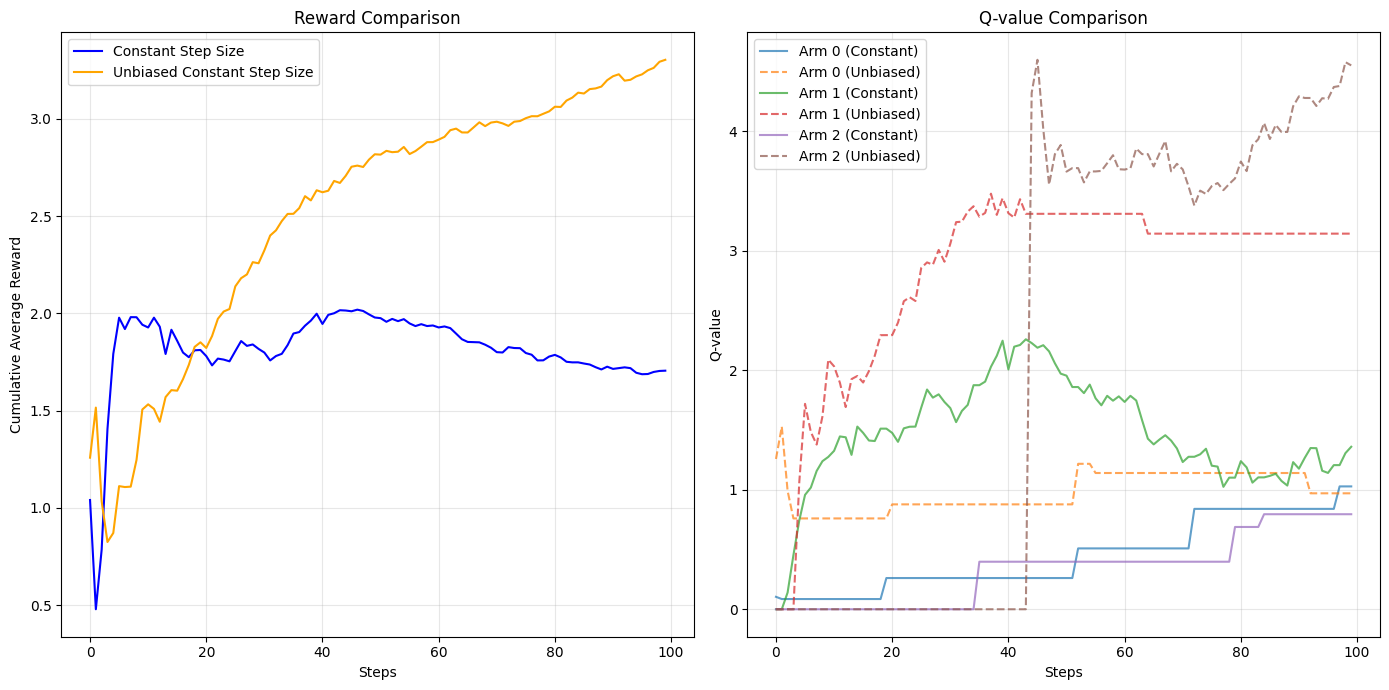

In [7]:
import numpy as np
import matplotlib.pyplot as plt

class BanditProblem:
    def __init__(self, true_values, alpha, total_steps, unbiased=False, epsilon=0.1):
        self.true_values = np.array(true_values)  # True mean rewards for each arm
        self.q_values = np.zeros(len(true_values))  # Initial estimates Q0(a) = 0
        self.alpha = alpha  # Base step size
        self.total_steps = total_steps  # Number of timesteps
        self.unbiased = unbiased
        self.epsilon = epsilon  # If True, use unbiased constant step size
        self.o_trace = np.zeros(len(true_values))  # Trace values for unbiased method

        # Tracking variables
        self.action_counts = np.zeros(len(true_values))  # Count of actions selected
        self.rewards = []  # Observed rewards
        self.q_history = []  # Q-value history for plotting

    def update_step_size(self, action):
        if self.unbiased:
            # Update trace for unbiased constant step size
            self.o_trace[action] = self.o_trace[action] + self.alpha * (1 - self.o_trace[action])
            return self.alpha / self.o_trace[action]
        else:
            # Constant step size
            return self.alpha

    def select_action(self):
        """Select the action with the highest estimated Q-value."""
        if np.random.rand() < self.epsilon:
            return np.random.choice(len(self.q_values))  # Exploration
        return np.argmax(self.q_values)  # Exploitation

    def step(self):

        # Simulate non-stationary environment by updating true values
        self.true_values += np.random.normal(0, 0.1, len(self.true_values))  # Non-stationary environment

        """Take one step in the environment."""
        action = self.select_action()
        reward = np.random.normal(self.true_values[action], 1)  # Generate reward
        self.rewards.append(reward)

        # Update Q-value
        step_size = self.update_step_size(action)
        self.q_values[action] += step_size * (reward - self.q_values[action])

        # Track action counts and Q-value history
        self.action_counts[action] += 1
        self.q_history.append(self.q_values.copy())

    def run(self):
        for _ in range(self.total_steps):
            self.step()

# Simulation parameters
true_values = [1.0, 2.0, 3.0]  # True mean rewards for 3 arms
alpha = 0.1  # Base step size
total_steps = 100  # Number of steps for comparison

# Run bandit with constant step size
bandit_constant = BanditProblem(true_values, alpha, total_steps, unbiased=False)
bandit_constant.run()

# Run bandit with unbiased constant step size
bandit_unbiased = BanditProblem(true_values, alpha, total_steps, unbiased=True)
bandit_unbiased.run()

# Plot results
plt.figure(figsize=(14, 7))

# Rewards comparison
plt.subplot(1, 2, 1)
plt.plot(np.cumsum(bandit_constant.rewards) / np.arange(1, total_steps + 1), label="Constant Step Size", color="blue")
plt.plot(np.cumsum(bandit_unbiased.rewards) / np.arange(1, total_steps + 1), label="Unbiased Constant Step Size", color="orange")

plt.xlabel("Steps")
plt.ylabel("Cumulative Average Reward")
plt.title("Reward Comparison")
plt.legend()
plt.grid(alpha=0.3)

# Q-value comparison
plt.subplot(1, 2, 2)
for arm in range(len(true_values)):
    plt.plot([q[arm] for q in bandit_constant.q_history], linestyle="-", label=f"Arm {arm} (Constant)", alpha=0.7)
    plt.plot([q[arm] for q in bandit_unbiased.q_history], linestyle="--", label=f"Arm {arm} (Unbiased)", alpha=0.7)

plt.xlabel("Steps")
plt.ylabel("Q-value")
plt.title("Q-value Comparison")
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()


**This plot compares the Constant Step Size method and the Unbiased Constant Step Size method in a non-stationary multi-armed bandit environment.**

Early in the steps, constant step size method shows slower learning because it uses a fixed learning rate (α), which is less adaptable to the changes in rewards.
Over time, it converges but struggles to adapt to changes in the non-stationary environment, leading to lower cumulative rewards.

**Unbiased Constant Step Size:**

Starts with rapid learning due to the dynamic adjustment of the step size. Initially, larger step sizes help to explore and update the values effectively.
Later, it stabilizes and performs better overall by **quickly adapting to changes** in the non-stationary rewards.

***Over 100 steps, the unbiased method consistently achieves higher rewards compared to the constant step size method.***

